In [1]:
import gym
import pandas as pd

# import class modules
from feature_engineer import FeatureEngineer
from trading_env_matsui import TradingEnvMatsui
from agent import Agent

# 環境の作成
env = gym.make('CartPole-v0')

/Users/tek/dev/python/mlbot-bybit/venv/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


/Users/tek/dev/python/mlbot-bybit/train/agent.py:62: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  states = torch.tensor(states).float().to(self.device)


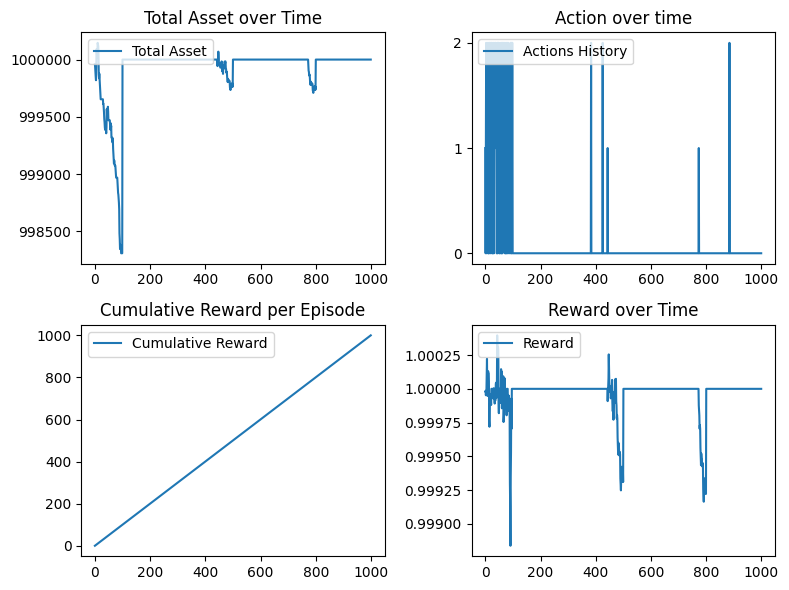

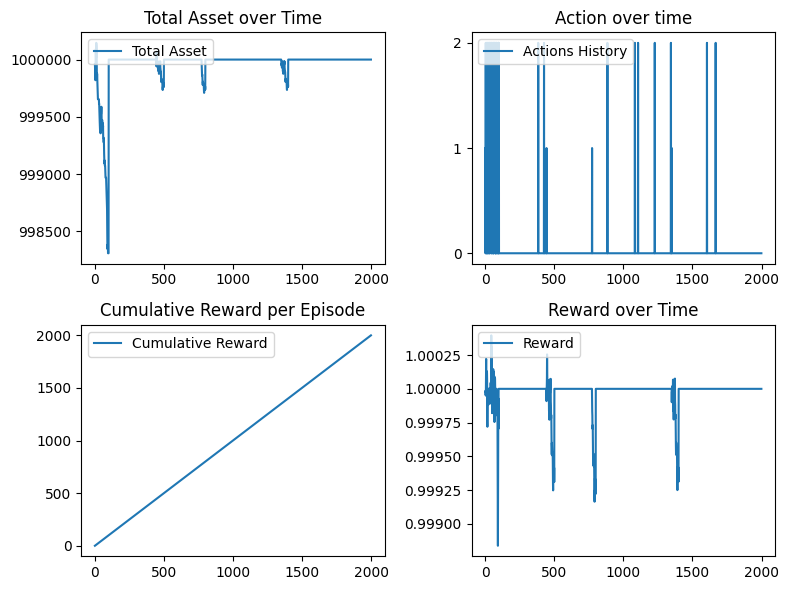

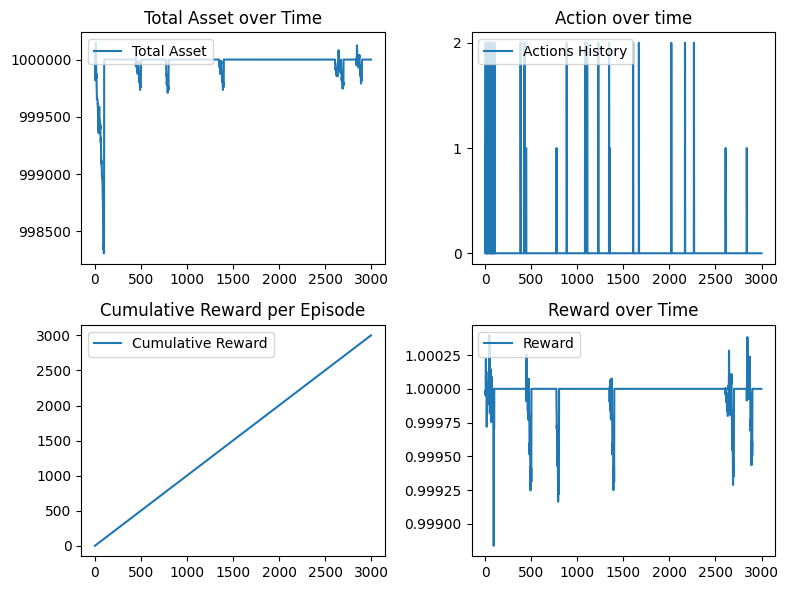

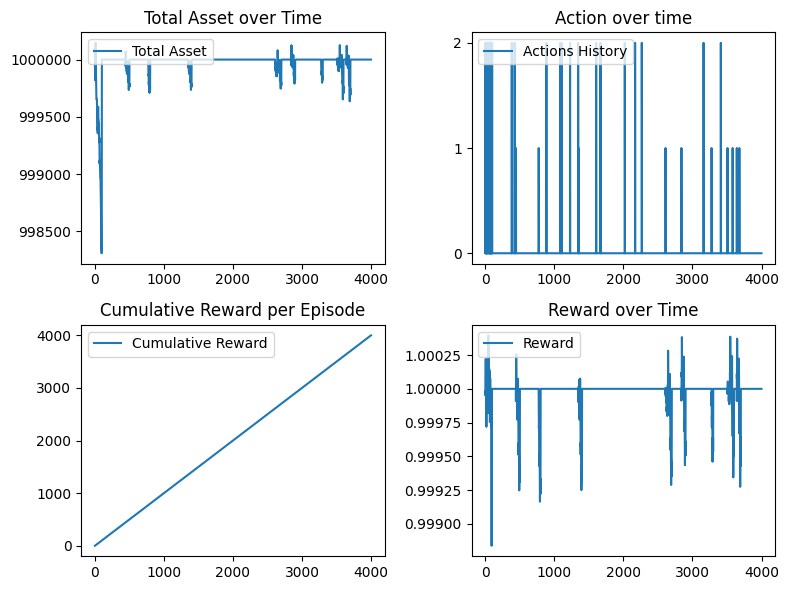

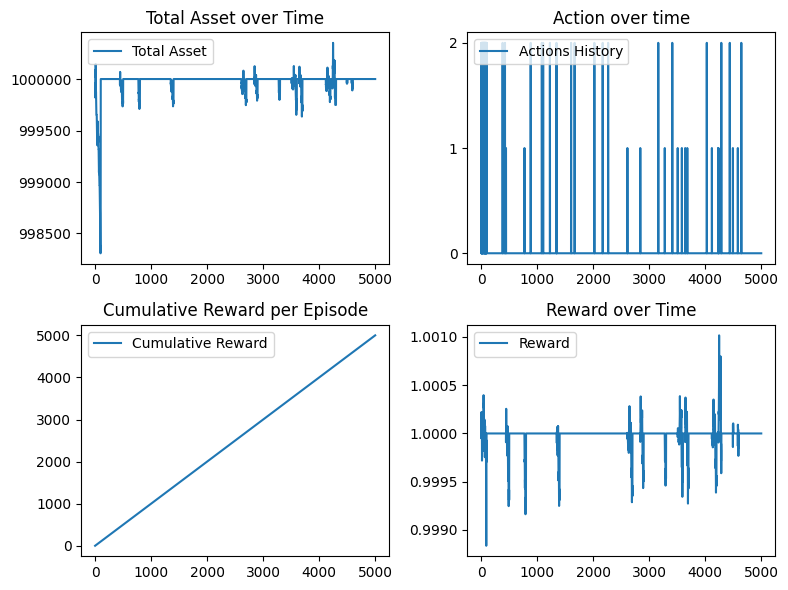

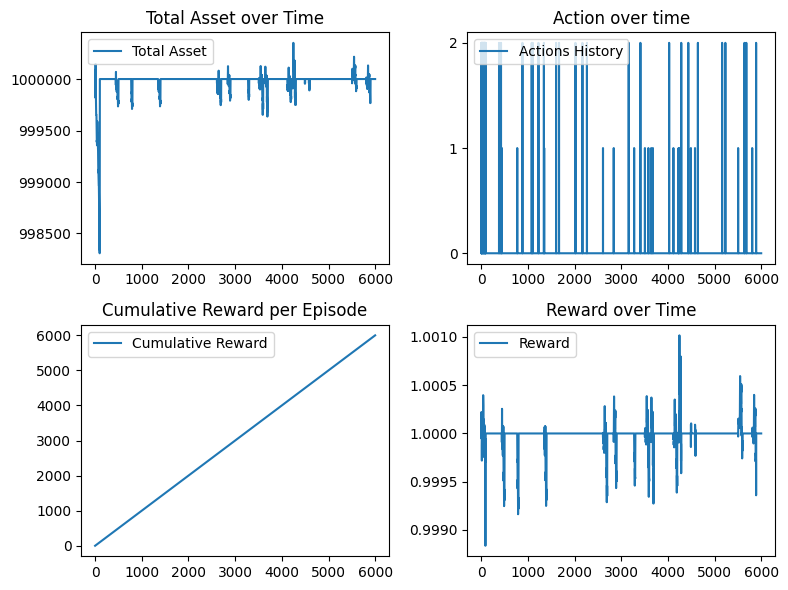

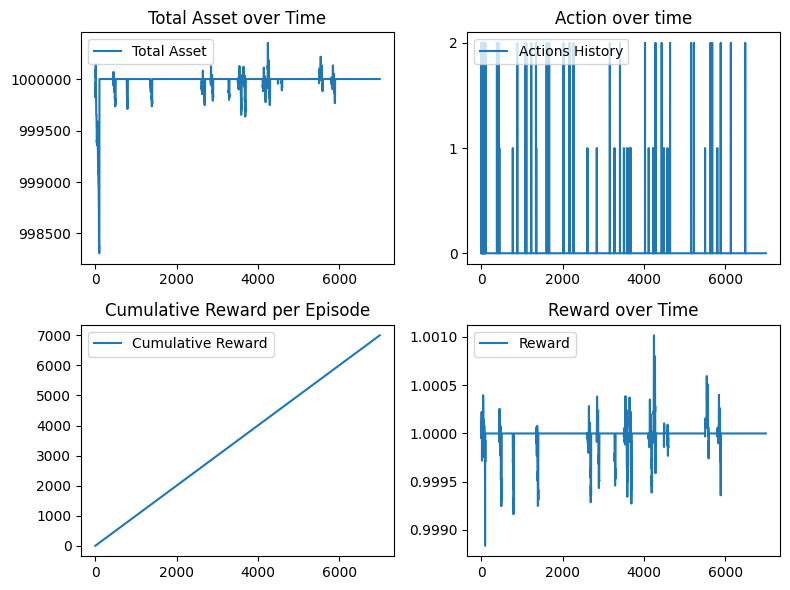

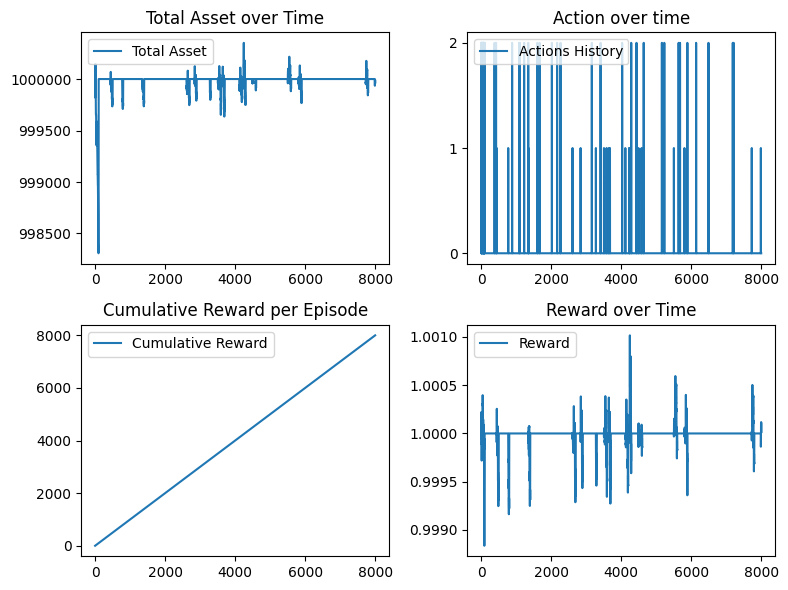

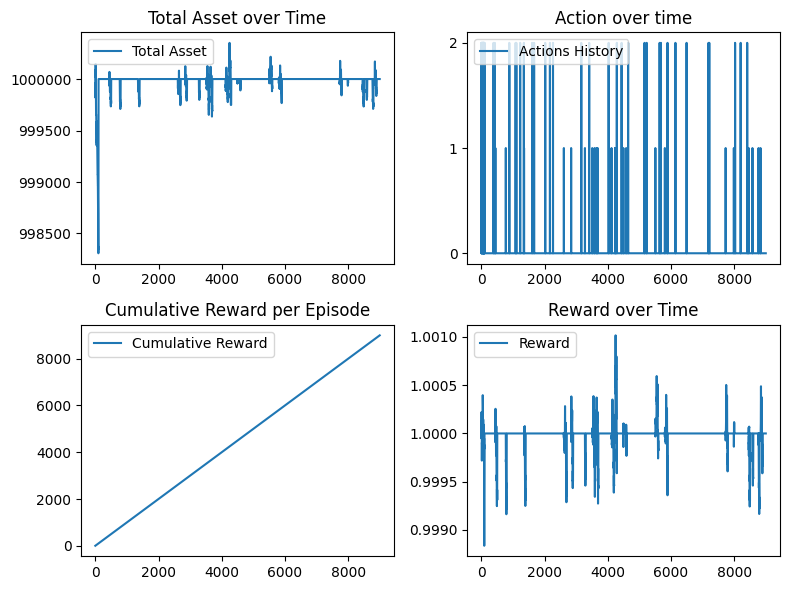

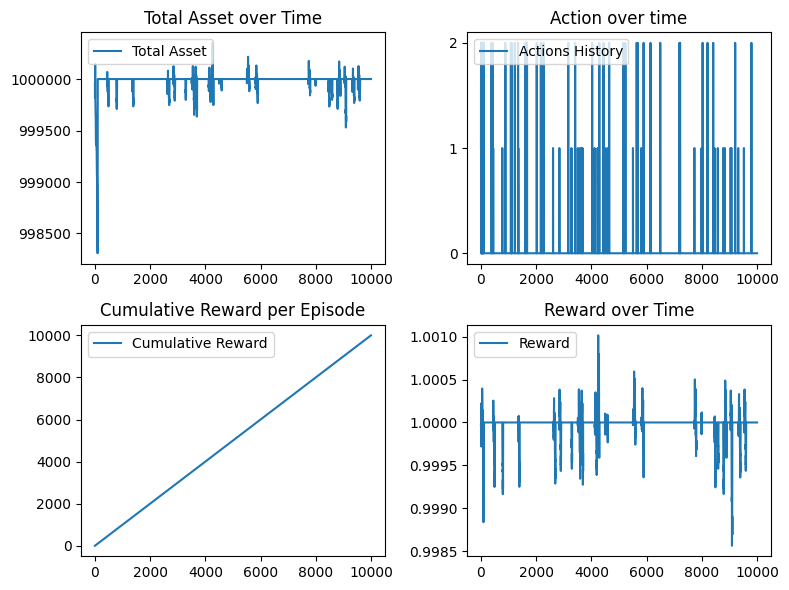

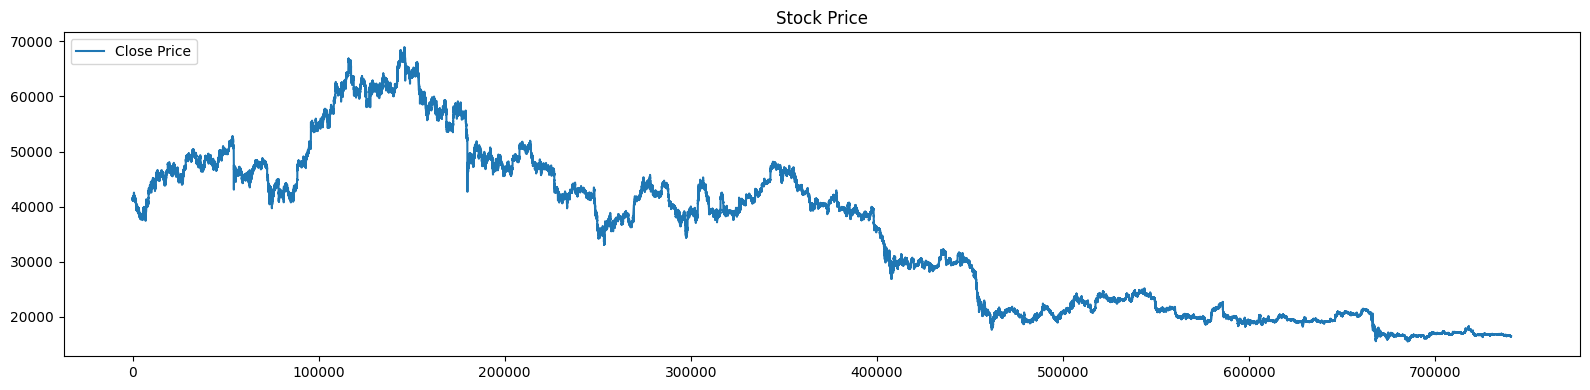

In [2]:
df = pd.read_csv('../csv/BTCUSDT_1m_20210801_20221231.csv')
fe = FeatureEngineer(df)
df = fe.feature_engineering(df)
# display(df)

# Initialize the environment and the agent
env = TradingEnvMatsui(df)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = Agent(env, state_size, action_size)

# Run the main training loop
EPISODES = 100
for e in range(EPISODES):
    agent.learn(e, EPISODES)
    if (e+1) % 10 == 0:
        env.plot_history()

# Plot the stock price at the end
env.plot_stock_price()

In [3]:
agent.save_model()